In [5]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("Fraud").getOrCreate()

In [56]:
df = spark.read.csv('fraud/creditcard.csv', header=True, inferSchema=True)
df.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [57]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import timeit
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
strIndexer = StringIndexer(inputCol='Class', outputCol='label')
assembler = VectorAssembler(inputCols=df.drop('Class').columns, outputCol='features')

df = assembler.transform(df)
df = strIndexer.fit(df).transform(df)

train, test = df.randomSplit([.7,.3], seed=0)

Accuracy: 0.9992824503314532


c:\Users\paulo\AppData\Local\Programs\Python\Python39\lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Time:  28.226457500000834


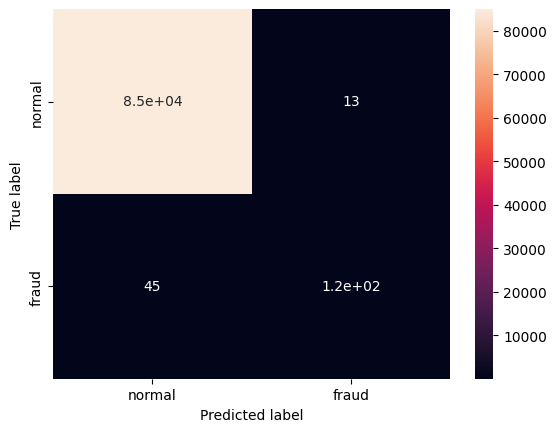

In [59]:
start = timeit.default_timer()

rfc = RandomForestClassifier(labelCol='label', featuresCol='features', numTrees=100, seed=0)

rfc_model = rfc.fit(train)

predictions = rfc_model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
print(f"Accuracy: {evaluator.evaluate(predictions)}")

metrics = MulticlassMetrics(predictions.select(['prediction','label']).rdd.map(tuple))
sns.heatmap(metrics.confusionMatrix().toArray(), annot=True, xticklabels = ['normal', 'fraud'], yticklabels = ['normal', 'fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')


stop = timeit.default_timer()
print('Time: ', stop - start)  
